In [15]:
import warnings

# Ignore the warning
warnings.filterwarnings('ignore')

# Your code that generates the warning goes here

# # Reset the warning filter to its default state (optional)
# warnings.filterwarnings('default')


# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [16]:
import pickle
# train_index
# test_index

with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)
train_index=train_test_index_dict["train_index"]
test_index=train_test_index_dict["test_index"]


In [17]:
!pip install nltk
import warnings
import re
import sklearn
import pandas as pd
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
#data cleaning and preprocessing
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('product_reviews.csv')
data.drop(["sentiment"],axis=1,inplace=True)
data.head()
data.stars.value_counts()




# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

texts=data["text"]
english_stop_words = nltk.corpus.stopwords.words('english')
# data_size=len(texts)
# for i in range(3):
#     text=data["text"][i]
#     tokens=word_tokenize(text)

#     stop_words=set(stopwords.words("english"))
#     filtered_tokens=[word for word in tokens if word.lower() not in stop_words ]
    
#     lemmtizer=WordNetLemmatizer()
#     lemmtized_tokens=[lemmtizer.lemmatize(word) for word in filtered_tokens]

#     data["text"][i]=lemmtized_tokens
def keep_only_letters(text):
    text=re.sub(r'[^a-zA-Z\s]','',text)
    return text

def convert_to_lowercase(text):
    return text.lower() 

def clean_reviews(text):
    text = keep_only_letters(text)
    text = convert_to_lowercase(text)
    return text  


def remove_stop_words(text):
    for stopword in english_stop_words:
        stopword = ' ' + stopword + ' '
        text = text.replace(stopword, ' ')
    return text


def text_stemming(text):
    stemmer = nltk.porter.PorterStemmer()
    stemmed = ' '.join([stemmer.stem(token) for token in text.split()])
    return stemmed


# data["text"] = data['text'].apply(clean_reviews)
# data["text"] = data['text'].apply(text_stemming)
# data["text"] = data['text'].apply(remove_stop_words)

print(data.head())



# train test data created


test_data=data.loc[test_index]
train_data=data.loc[train_index]

# Bow
vectorizer=CountVectorizer(binary=True,ngram_range=(1,1))
train_vec=vectorizer.fit_transform(train_data["text"])
test_vec=vectorizer.transform(test_data['text'])

print(train_vec.shape, test_vec.shape)



train_labels=train_data["stars"]
test_labels=test_data["stars"]
# print((test_labels).head())

classifier = MultinomialNB()
classifier.fit(train_vec,train_labels)


y_pred=classifier.predict(test_vec)

accuracy=accuracy_score(test_labels,y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(test_labels, y_pred))
data["stars"].value_counts()


Defaulting to user installation because normal site-packages is not writeable
                                                text  stars
0  Total bill for this horrible service? Over $8G...    1.0
1  Went in for a lunch. Steak sandwich was delici...    5.0
2  This place has gone down hill.  Clearly they h...    1.0
3  Walked in around 4 on a Friday afternoon, we s...    1.0
4  Michael from Red Carpet VIP is amazing ! I rea...    4.0
(17862, 23274) (8799, 23274)
Accuracy: 0.7096260938743039
Classification Report:
              precision    recall  f1-score   support

         1.0       0.74      0.78      0.76      1149
         2.0       0.44      0.05      0.09       587
         4.0       0.49      0.50      0.49      1981
         5.0       0.79      0.85      0.82      5082

    accuracy                           0.71      8799
   macro avg       0.61      0.55      0.54      8799
weighted avg       0.69      0.71      0.69      8799



stars
5.0    15397
4.0     6003
1.0     3481
2.0     1780
Name: count, dtype: int64

In [18]:
## using tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vec=vectorizer.fit_transform(train_data["text"])
test_vec=vectorizer.transform(test_data['text'])

print(train_vec.shape, test_vec.shape)



train_labels=train_data["stars"]
test_labels=test_data["stars"]
# print((test_labels).head())

classifier = MultinomialNB()
classifier.fit(train_vec,train_labels)


y_pred=classifier.predict(test_vec)

accuracy=accuracy_score(test_labels,y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(test_labels, y_pred))



(17862, 23274) (8799, 23274)
Accuracy: 0.5847255369928401
Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.04      0.08      1149
         2.0       0.00      0.00      0.00       587
         4.0       0.56      0.01      0.02      1981
         5.0       0.58      1.00      0.74      5082

    accuracy                           0.58      8799
   macro avg       0.53      0.26      0.21      8799
weighted avg       0.59      0.58      0.44      8799



### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [19]:
import gzip
import numpy as np
f = gzip.GzipFile('./roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

(26661, 1024)


In [20]:
Data=embeds
df=pd.DataFrame(Data)
X=df
## data standaraziation
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
Data=scalar.fit_transform(Data)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


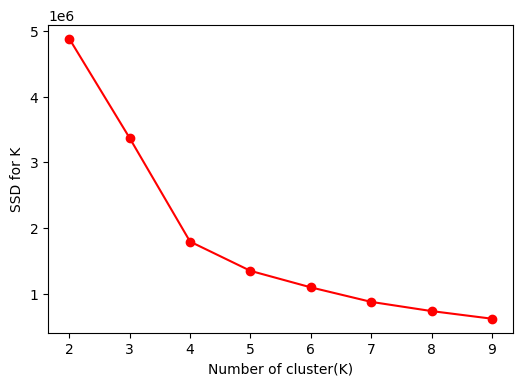

In [21]:
from sklearn.cluster import KMeans
ssd=[]
for k in range(2,10):
    model1=KMeans(n_clusters=k)
    model1.fit_transform(Data)
    ssd.append(model1.inertia_)

plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(2,10),ssd,color="red",marker="o")
plt.xlabel("Number of cluster(K)")
plt.ylabel("SSD for K")
plt.show()

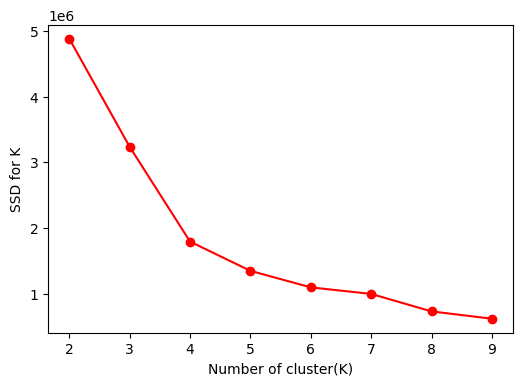

In [22]:
## for kmeans++
import seaborn as sns
ssd=[]
for k in range(2,10):
    model2=KMeans(n_clusters=k,init="k-means++")
    model2.fit_transform(Data)
    ssd.append(model2.inertia_)

plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(2,10),ssd,color="red",marker="o")
plt.xlabel("Number of cluster(K)")
plt.ylabel("SSD for K")
plt.show()

In [23]:

# def contingency_matrix(true_labels, pred_labels):
    
#     """
#     Compute the contingency matrix.
#     """
#     num_classes = len(np.unique(true_labels))
#     num_clusters = len(np.unique(pred_labels))
#     contingency_mat = np.zeros((num_classes, num_clusters))
  
#     for i in range(len(true_labels)):
#         true_label =int( true_labels[i])-1
#         pred_label = int(pred_labels[i])
#         print(true_label, pred_label)
#         contingency_mat[true_label][pred_label] += 1
    
#     return contingency_mat


[0 1 2 3]


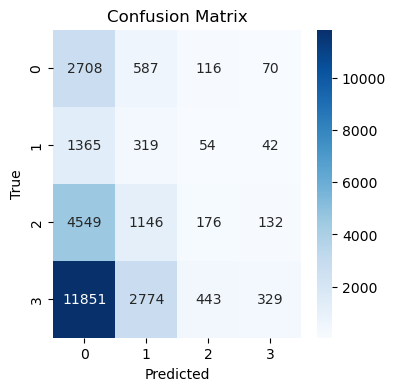

The purity score is 57.75%


In [24]:
### checking the purinty score

from sklearn.metrics.cluster import contingency_matrix
import seaborn as sns
def purity_score(y_true, y_pred):
   
    confusion_matrix = contingency_matrix(y_true, y_pred)
    print(np.unique(y_pred))
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
   
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

model=KMeans(n_clusters=4)
    
clusters=model.fit_predict(Data)
centroids=model.cluster_centers_
df["clusters"]=clusters
df.clusters.unique()

labels=model.labels_
index=[]
index.extend(test_index)
index.extend(train_index)
y=data.iloc[index]["stars"]
# y.head()

purity = purity_score(y, labels)
print(f"The purity score is {round(purity*100, 2)}%")

In [25]:
### calculating nmi
def entropy(labels):
    """
    Compute the entropy of a set of labels.
    """
    probs = np.bincount(labels) / len(labels)
    entropy = -np.sum(probs * np.log2(probs + 1e-10))  # Add small epsilon to prevent log(0)
    return entropy

def mutual_information(contingency_mat):
    """
    Compute mutual information from the contingency matrix.
    """
    P = contingency_mat / np.sum(contingency_mat)  # Convert contingency matrix to probabilities
    
    # Compute marginal probabilities
    p_class = np.sum(P, axis=1)
    p_cluster = np.sum(P, axis=0)
    
    # Compute mutual information
    MI = 0
    for i in range(P.shape[0]):
        for j in range(P.shape[1]):
            if P[i][j] > 0:
                MI += P[i][j] * np.log2(P[i][j] / (p_class[i] * p_cluster[j] + 1e-10))  # Add small epsilon to prevent log(0)
                
    return MI

def normalized_mutual_info(true_labels, pred_labels):
    """
    Compute Normalized Mutual Information (NMI) between true and predicted labels.
    """
    contingency_mat = contingency_matrix(true_labels, pred_labels)
    H_true = entropy(true_labels)
    H_pred = entropy(pred_labels)
    MI = mutual_information(contingency_mat)
    
    NMI = MI / np.sqrt(H_true * H_pred)
    return NMI

# Example usage:
true_labels = np.array([0, 0, 1, 1, 2, 2])
pred_labels = np.array([0, 0, 1, 2, 2, 2])

nmi_score = normalized_mutual_info(true_labels, pred_labels)
print("Normalized Mutual Information (NMI):", nmi_score)

Normalized Mutual Information (NMI): 0.7402999401570404


In [28]:
def rand_score(y_true, y_pred):
    # Initialize variables to count agreements and disagreements
    agree_same_cluster = 0
    agree_diff_cluster = 0
    disagree = 0

    n = len(y_true)

    # Compare each pair of samples
    for i in range(n):
        for j in range(i + 1, n):
            true_i = y_true[i]
            true_j = y_true[j]
            pred_i = y_pred[i]
            pred_j = y_pred[j]

            if true_i == true_j:
                if pred_i == pred_j:
                    agree_same_cluster += 1
                else:
                    disagree += 1
            else:
                if pred_i != pred_j:
                    agree_diff_cluster += 1
                else:
                    disagree += 1

    # Calculate Rand Score
    rand_score = (agree_same_cluster + agree_diff_cluster) / (agree_same_cluster + agree_diff_cluster + disagree)
    return rand_score


rand_score = rand_score(y, labels)


print(f"The Rand Score is {rand_score}")


The Rand Score is 0.4444444444444444
